In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Package

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Load the Dataset

In [3]:
# Load the CSV files into DataFrames
fundamentals_df = pd.read_csv('/content/drive/MyDrive/NYSE_Dataset/fundamentals.csv')
prices_split_adjusted_df = pd.read_csv('/content/drive/MyDrive/NYSE_Dataset/prices-split-adjusted.csv')
prices_df = pd.read_csv('/content/drive/MyDrive/NYSE_Dataset/prices.csv')
securities_df = pd.read_csv('/content/drive/MyDrive/NYSE_Dataset/securities.csv')


# Display the first few rows of each DataFrame

In [4]:
print("Fundamentals DataFrame:")
fundamentals_df.head()

Fundamentals DataFrame:


,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [5]:
print("\nPrices Split Adjusted DataFrame:")
prices_split_adjusted_df.head()


Prices Split Adjusted DataFrame:


,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [6]:
print("\nPrices DataFrame:")
prices_df.head()


Prices DataFrame:


,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [7]:
print("\nSecurities DataFrame:")
securities_df.head()


Securities DataFrame:


,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


# Inspect the Data

In [8]:
print("\nFundamentals DataFrame Info:")
fundamentals_df.info()


Fundamentals DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 79 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           1781 non-null   int64  
 1   Ticker Symbol                                        1781 non-null   object 
 2   Period Ending                                        1781 non-null   object 
 3   Accounts Payable                                     1781 non-null   float64
 4   Accounts Receivable                                  1781 non-null   float64
 5   Add'l income/expense items                           1781 non-null   float64
 6   After Tax ROE                                        1781 non-null   float64
 7   Capital Expenditures                                 1781 non-null   float64
 8   Capital Surplus                       

In [9]:
print("\nPrices Split Adjusted DataFrame Info:")
prices_split_adjusted_df.info()


Prices Split Adjusted DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [10]:
print("\nPrices DataFrame Info:")
prices_df.info()


Prices DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [11]:
print("\nSecurities DataFrame Info:")
securities_df.info()


Securities DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Ticker symbol            505 non-null    object
 1   Security                 505 non-null    object
 2   SEC filings              505 non-null    object
 3   GICS Sector              505 non-null    object
 4   GICS Sub Industry        505 non-null    object
 5   Address of Headquarters  505 non-null    object
 6   Date first added         307 non-null    object
 7   CIK                      505 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 31.7+ KB


# Summary statistics

In [12]:
print("\nFundamentals DataFrame Description:")
fundamentals_df.describe()


Fundamentals DataFrame Description:


,Unnamed: 0,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
count,1781.000000,1.781000e+03,1.781000e+03,1.781000e+03,1781.000000,1.781000e+03,1.781000e+03,1482.000000,1.781000e+03,1.781000e+03,...,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1.781000e+03,1608.000000,1562.000000,1.562000e+03
mean,890.000000,4.673418e+09,-6.353484e+07,6.908940e+07,43.601348,-1.251925e+09,5.351784e+09,74.457490,8.521399e+09,-6.787749e+07,...,6.726349e+09,4.699919e+09,1.188846e+10,4.380420e+10,5.569266e+10,2.029154e+10,-3.951522e+09,2013.305348,3.353707,6.024244e+08
std,514.274732,1.406047e+10,7.562794e+08,6.848143e+08,233.924028,2.979963e+09,1.133977e+10,102.298374,5.432105e+10,3.903369e+08,...,1.344800e+10,9.538832e+09,2.584429e+10,1.817039e+11,2.033612e+11,4.095355e+10,1.407047e+10,19.953135,4.695896,1.142585e+09
min,0.000000,0.000000e+00,-6.452000e+09,-6.768000e+09,0.000000,-3.798500e+10,-7.215000e+08,0.000000,2.100000e+04,-5.562000e+09,...,0.000000e+00,0.000000e+00,-1.324400e+10,2.577000e+06,2.705000e+06,1.514000e+06,-2.297340e+11,1215.000000,-61.200000,-1.513945e+09
25%,445.000000,5.160000e+08,-1.040000e+08,-2.638000e+06,10.000000,-1.151200e+09,4.791000e+08,17.000000,3.088000e+08,-5.400000e+07,...,1.044178e+09,5.640760e+08,2.201492e+09,3.843300e+09,6.552689e+09,3.714000e+09,-3.040895e+09,2013.000000,1.590000,1.493318e+08
50%,890.000000,1.334000e+09,-1.830000e+07,2.000000e+06,16.000000,-3.580000e+08,1.997080e+09,41.000000,8.625900e+08,0.000000e+00,...,2.747200e+09,1.701500e+09,4.983000e+09,9.141000e+09,1.517000e+10,8.023200e+09,-3.068350e+08,2014.000000,2.810000,2.929409e+08
75%,1335.000000,3.246000e+09,7.816000e+06,3.359200e+07,26.000000,-1.291000e+08,5.735000e+09,90.000000,2.310000e+09,0.000000e+00,...,6.162000e+09,4.381000e+09,1.080900e+10,2.389700e+10,3.599710e+10,1.748600e+10,0.000000e+00,2015.000000,4.590000,5.492163e+08
max,1780.000000,2.069390e+11,2.266400e+10,1.416200e+10,5789.000000,5.000000e+06,1.082880e+11,1041.000000,7.281110e+11,3.755000e+09,...,1.396600e+11,9.028100e+10,2.562050e+11,2.340547e+12,2.572274e+12,4.856510e+11,0.000000e+00,2016.000000,50.090000,1.610769e+10


In [13]:
print("\nPrices Split Adjusted DataFrame Description:")
prices_split_adjusted_df.describe()


Prices Split Adjusted DataFrame Description:


,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [14]:
print("\nPrices DataFrame Description:")
prices_df.describe()


Prices DataFrame Description:


,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [15]:
print("\nSecurities DataFrame Description:")
securities_df.describe()


Securities DataFrame Description:


,CIK
count,5.050000e+02
mean,7.074490e+05
std,5.144375e+05
min,1.800000e+03
25%,8.631200e+04
50%,8.310010e+05
75%,1.075531e+06
max,1.659166e+06


In [16]:
prices_df

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


# Sector Distribution

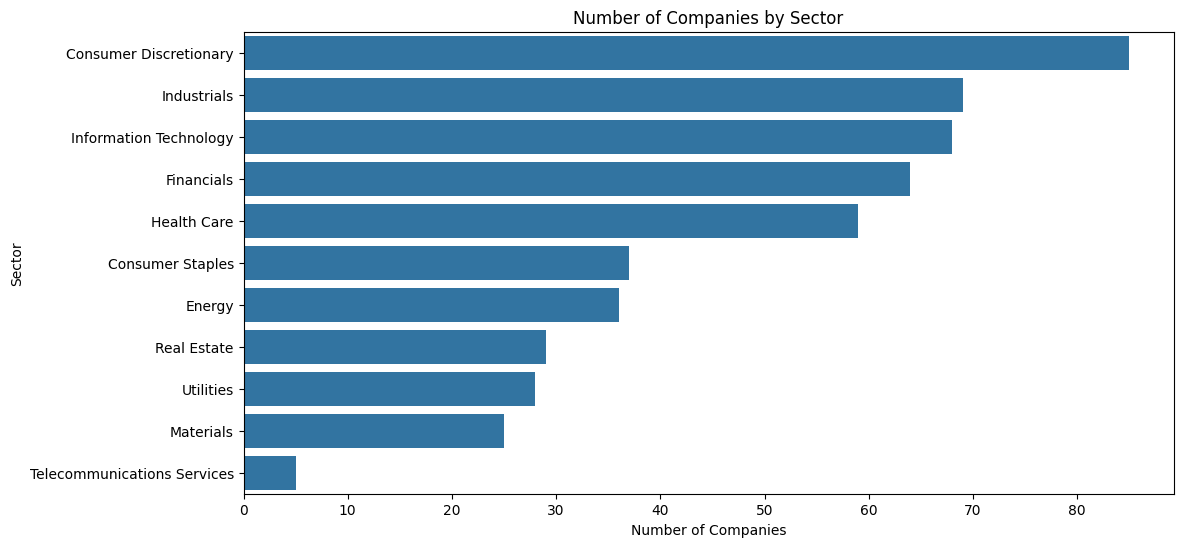

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(y='GICS Sector', data=securities_df, order=securities_df['GICS Sector'].value_counts().index)
plt.title('Number of Companies by Sector')
plt.xlabel('Number of Companies')
plt.ylabel('Sector')
plt.show()


# Merge Datasets

In [18]:
# Merge prices and prices_split_adjusted on 'symbol' and 'date'
merged_prices = pd.merge(prices_df, prices_split_adjusted_df, on=['symbol', 'date'], suffixes=('', '_adjusted'))

# Merge with securities on 'symbol' and 'Ticker symbol'
merged_data = pd.merge(merged_prices, securities_df, left_on='symbol', right_on='Ticker symbol')

# Merge with fundamentals on 'symbol' and 'Ticker symbol'
merged_data = pd.merge(merged_prices, fundamentals_df, left_on='symbol', right_on='Ticker Symbol')


# Distribution of Adjusted and Unadjusted Closing Prices

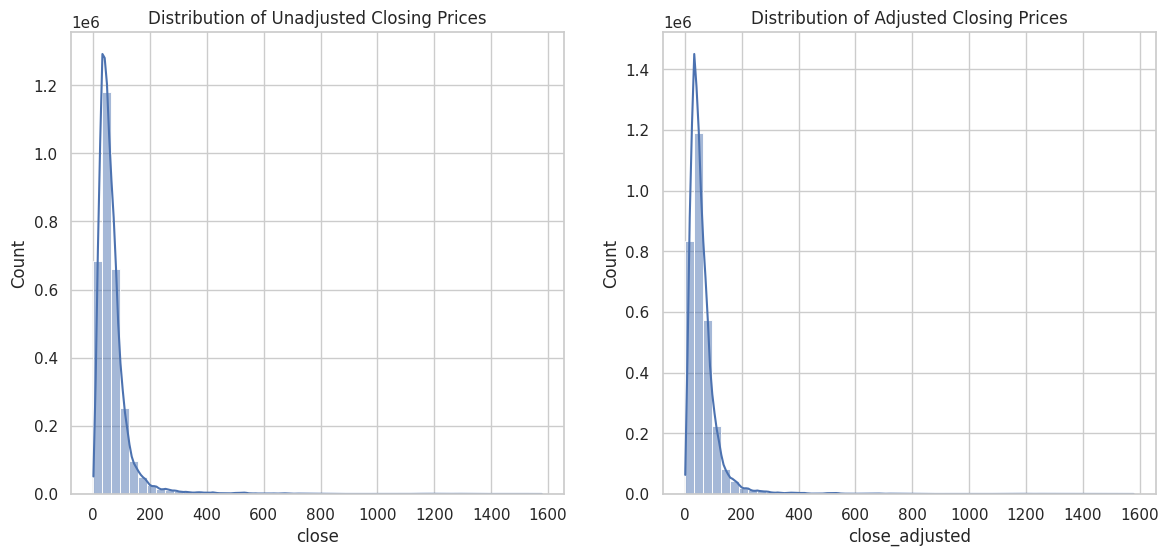

In [19]:
# Set plot style
sns.set(style="whitegrid")

# Distribution of Adjusted and Unadjusted Closing Prices
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(merged_data['close'], bins=50, kde=True)
plt.title('Distribution of Unadjusted Closing Prices')

plt.subplot(1, 2, 2)
sns.histplot(merged_data['close_adjusted'], bins=50, kde=True)
plt.title('Distribution of Adjusted Closing Prices')
plt.show()


# Trends Over Time for Adjusted vs. Unadjusted Prices

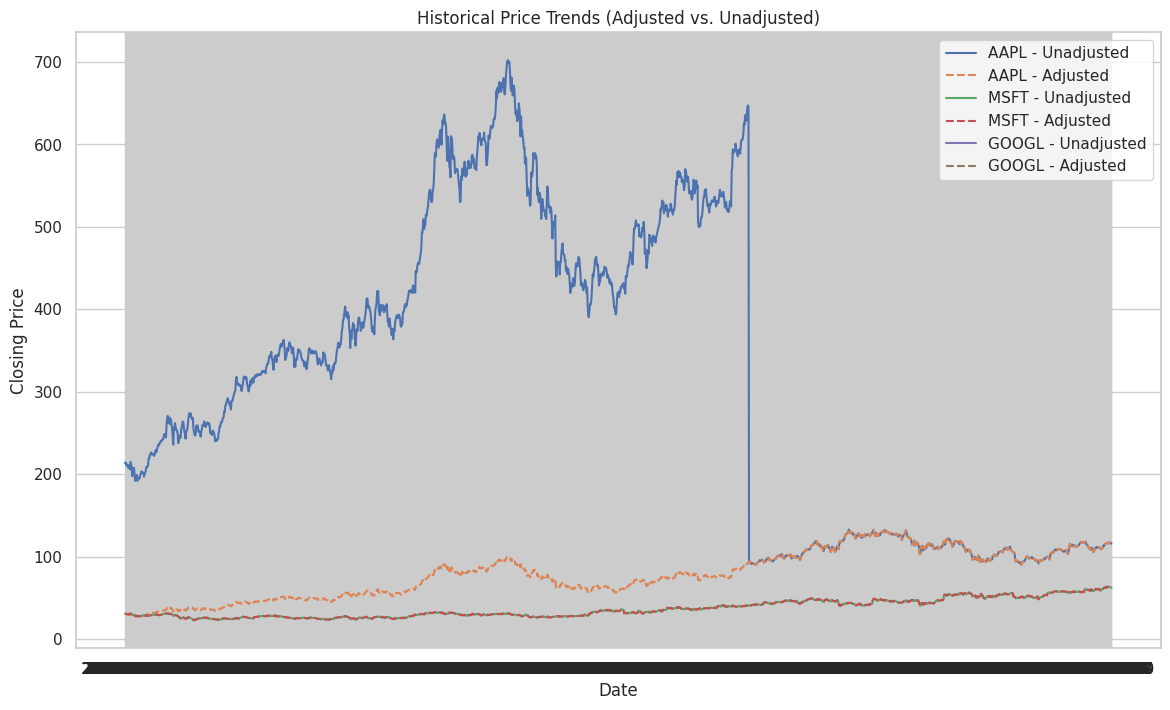

In [20]:
# Select a few symbols for demonstration
symbols_to_plot = ['AAPL', 'MSFT', 'GOOGL']  # Example symbols
plt.figure(figsize=(14, 8))

for symbol in symbols_to_plot:
    subset = merged_data[merged_data['symbol'] == symbol]
    plt.plot(subset['date'], subset['close'], label=f'{symbol} - Unadjusted')
    plt.plot(subset['date'], subset['close_adjusted'], label=f'{symbol} - Adjusted', linestyle='--')

plt.title('Historical Price Trends (Adjusted vs. Unadjusted)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


# Correlation Matrix

In [21]:
# Exclude 'symbol' and 'date' columns from correlation calculation
cols_to_exclude = ['symbol', 'date', 'Ticker Symbol', "For Year", "Period Ending", "Unnamed: 0"]
cols_to_include = [col for col in merged_data.columns if col not in cols_to_exclude]
corr_matrix = merged_data[cols_to_include].corr()


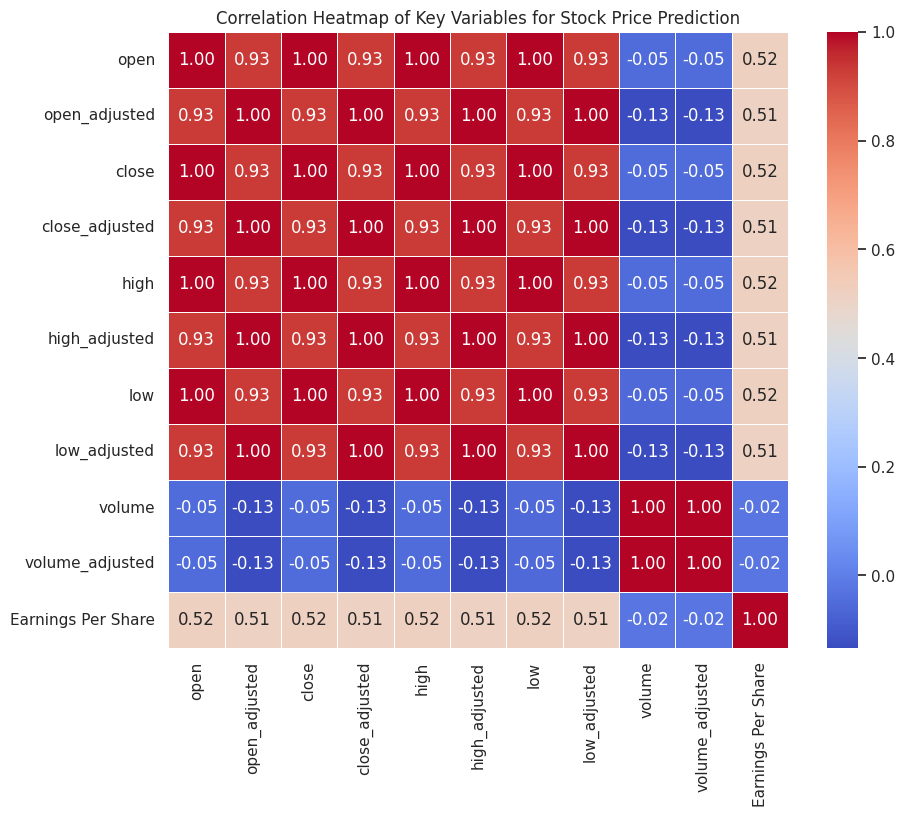

In [22]:
# Here's a subset of relevant columns based on the correlation matrix you've shown
relevant_columns = ['open','open_adjusted','close', 'close_adjusted', 'high','high_adjusted', 'low','low_adjusted', 'volume', "volume_adjusted", 'Earnings Per Share']

# Subset the correlation matrix
relevant_corr_matrix = corr_matrix.loc[relevant_columns, relevant_columns]

# Plotting the heatmap for relevant correlations
plt.figure(figsize=(10, 8))
sns.heatmap(relevant_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Key Variables for Stock Price Prediction')
plt.show()


## Pre-processing

In [23]:
merged_data

,date,symbol,open,close,low,high,volume,open_adjusted,close_adjusted,low_adjusted,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,2010-01-04,AAL,4.840000,4.770000,4.660000,4.940000,9837300.0,4.840000,4.770000,4.660000,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,2010-01-04,AAL,4.840000,4.770000,4.660000,4.940000,9837300.0,4.840000,4.770000,4.660000,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2010-01-04,AAL,4.840000,4.770000,4.660000,4.940000,9837300.0,4.840000,4.770000,4.660000,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,2010-01-04,AAL,4.840000,4.770000,4.660000,4.940000,9837300.0,4.840000,4.770000,4.660000,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,2010-01-05,AAL,4.790000,5.310000,4.710000,5.370000,25212000.0,4.790000,5.310000,4.710000,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025904,2016-12-28,CSRA,31.980000,31.690001,31.570000,32.220001,816800.0,31.980000,31.690001,31.570000,...,1.004522e+09,1.085739e+09,6.454600e+07,4.781754e+09,4.846300e+09,4.250447e+09,0.0,2016.0,0.54,1.905963e+08
3025905,2016-12-29,CSRA,31.549999,31.940001,31.549999,31.980000,501600.0,31.549999,31.940001,31.549999,...,7.943710e+08,7.020470e+08,1.067087e+09,1.094195e+09,2.161282e+09,4.069746e+09,0.0,NaN,NaN,NaN
3025906,2016-12-29,CSRA,31.549999,31.940001,31.549999,31.980000,501600.0,31.549999,31.940001,31.549999,...,1.004522e+09,1.085739e+09,6.454600e+07,4.781754e+09,4.846300e+09,4.250447e+09,0.0,2016.0,0.54,1.905963e+08
3025907,2016-12-30,CSRA,32.000000,31.840000,31.740000,32.040001,884300.0,32.000000,31.840000,31.740000,...,7.943710e+08,7.020470e+08,1.067087e+09,1.094195e+09,2.161282e+09,4.069746e+09,0.0,NaN,NaN,NaN


## Feature Selection

In [24]:
# Selecting initial important features
initial_features = [
    'date', 'symbol', 'open', 'close','low', 'high', 'volume',
    'Earnings Before Interest and Tax', 'Net Income', 'Operating Income', 'Gross Profit',
    'Profit Margin', 'Gross Margin', 'Operating Margin', 'Pre-Tax Margin', 'After Tax ROE',
    'Earnings Per Share', 'Current Ratio', 'Quick Ratio', 'Cash Ratio', 'Long-Term Debt',
    'Short-Term Debt / Current Portion of Long-Term Debt', 'Total Liabilities', 'Total Equity',
    'Net Cash Flow', 'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
    'Net Cash Flows-Investing', 'Estimated Shares Outstanding', 'Sale and Purchase of Stock'
]

# Drop rows with missing values in the selected features
df_sf = merged_data[initial_features].dropna()

# Convert 'date' column to datetime if not already done
df_sf['date'] = pd.to_datetime(df_sf['date'])

# Check the updated dataframe
df_sf

,date,symbol,open,close,low,high,volume,Earnings Before Interest and Tax,Net Income,Operating Income,...,Long-Term Debt,Short-Term Debt / Current Portion of Long-Term Debt,Total Liabilities,Total Equity,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Estimated Shares Outstanding,Sale and Purchase of Stock
0,2010-01-04,AAL,4.840000,4.770000,4.660000,4.940000,9837300.0,-1.813000e+09,-1.876000e+09,1.480000e+08,...,7.116000e+09,1.419000e+09,2.489100e+10,-7.987000e+09,197000000.0,1.285000e+09,4.830000e+08,-1.571000e+09,3.350000e+08,0.000000e+00
1,2010-01-04,AAL,4.840000,4.770000,4.660000,4.940000,9837300.0,-1.324000e+09,-1.834000e+09,1.399000e+09,...,1.535300e+10,1.446000e+09,4.500900e+10,-2.731000e+09,660000000.0,6.750000e+08,3.799000e+09,-3.814000e+09,1.630222e+08,0.000000e+00
2,2010-01-04,AAL,4.840000,4.770000,4.660000,4.940000,9837300.0,4.099000e+09,2.882000e+09,4.249000e+09,...,1.604300e+10,1.677000e+09,4.120400e+10,2.021000e+09,-146000000.0,3.080000e+09,-3.150000e+08,-2.911000e+09,7.169154e+08,-1.052000e+09
3,2010-01-04,AAL,4.840000,4.770000,4.660000,4.940000,9837300.0,5.496000e+09,7.610000e+09,6.204000e+09,...,1.833000e+10,2.231000e+09,4.278000e+10,5.635000e+09,-604000000.0,6.249000e+09,-1.259000e+09,-5.594000e+09,6.681299e+08,-3.846000e+09
4,2010-01-05,AAL,4.790000,5.310000,4.710000,5.370000,25212000.0,-1.813000e+09,-1.876000e+09,1.480000e+08,...,7.116000e+09,1.419000e+09,2.489100e+10,-7.987000e+09,197000000.0,1.285000e+09,4.830000e+08,-1.571000e+09,3.350000e+08,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025900,2016-12-23,CSRA,31.930000,31.889999,31.520000,31.930000,371400.0,2.025640e+08,1.029220e+08,1.873430e+08,...,2.764854e+09,1.701910e+08,4.781754e+09,6.454600e+07,125037000.0,5.535160e+08,1.176840e+09,-1.605319e+09,1.905963e+08,-7.473300e+07
3025902,2016-12-27,CSRA,31.940001,32.020000,31.920000,32.110001,892500.0,2.025640e+08,1.029220e+08,1.873430e+08,...,2.764854e+09,1.701910e+08,4.781754e+09,6.454600e+07,125037000.0,5.535160e+08,1.176840e+09,-1.605319e+09,1.905963e+08,-7.473300e+07
3025904,2016-12-28,CSRA,31.980000,31.690001,31.570000,32.220001,816800.0,2.025640e+08,1.029220e+08,1.873430e+08,...,2.764854e+09,1.701910e+08,4.781754e+09,6.454600e+07,125037000.0,5.535160e+08,1.176840e+09,-1.605319e+09,1.905963e+08,-7.473300e+07
3025906,2016-12-29,CSRA,31.549999,31.940001,31.549999,31.980000,501600.0,2.025640e+08,1.029220e+08,1.873430e+08,...,2.764854e+09,1.701910e+08,4.781754e+09,6.454600e+07,125037000.0,5.535160e+08,1.176840e+09,-1.605319e+09,1.905963e+08,-7.473300e+07


In [25]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29411 sha256=a4ce2c835cda4e726e0c06fefd74e681c52797f3a5c214961a0fb0bb6c47be58
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [26]:
import ta
from ta.volatility import AverageTrueRange, BollingerBands
from ta.trend import MACD, ADXIndicator
from ta.momentum import RSIIndicator, StochasticOscillator, ROCIndicator
from ta.trend import IchimokuIndicator
from ta.volume import ChaikinMoneyFlowIndicator
from ta.volume import OnBalanceVolumeIndicator
from ta.momentum import WilliamsRIndicator
from ta.trend import CCIIndicator


In [27]:
# Sort the data by date for each symbol
df_sf = df_sf.sort_values(by=['symbol', 'date'])

# Initialize new columns for technical indicators
df_sf['RSI'] = df_sf.groupby('symbol')['close'].transform(lambda x: RSIIndicator(x, window=14).rsi())
df_sf['MV20'] = df_sf.groupby('symbol')['close'].transform(lambda x: x.rolling(window=20).mean())
df_sf['MV50'] = df_sf.groupby('symbol')['close'].transform(lambda x: x.rolling(window=50).mean())
df_sf['MV200'] = df_sf.groupby('symbol')['close'].transform(lambda x: x.rolling(window=200).mean())


In [28]:
macd = df_sf.groupby('symbol')['close'].apply(lambda x: MACD(x).macd())
df_sf['MACD'] = macd.reset_index(level=0, drop=True)

adx = df_sf.groupby('symbol').apply(lambda x: ADXIndicator(x['high'], x['low'], x['close']).adx())
df_sf['ADX'] = adx.reset_index(level=0, drop=True)


In [29]:
# Manually calculate the Accumulation/Distribution (AD) line
def calculate_ad(high, low, close, volume):
    clv = ((close - low) - (high - close)) / (high - low)
    clv = clv.fillna(0)  # Fill NaN values
    ad = (clv * volume).cumsum()
    return ad

df_sf['AD'] = df_sf.groupby('symbol').apply(lambda x: calculate_ad(x['high'], x['low'], x['close'], x['volume'])).reset_index(level=0, drop=True)


In [30]:
# Bollinger Bands
bollinger = df_sf.groupby('symbol')['close'].apply(lambda x: BollingerBands(close=x).bollinger_mavg())
df_sf['Bollinger_MAVG'] = bollinger.reset_index(level=0, drop=True)
df_sf['Bollinger_High'] = df_sf.groupby('symbol')['close'].transform(lambda x: BollingerBands(close=x).bollinger_hband())
df_sf['Bollinger_Low'] = df_sf.groupby('symbol')['close'].transform(lambda x: BollingerBands(close=x).bollinger_lband())


In [31]:
# Stochastic Oscillator
stochastic = df_sf.groupby('symbol').apply(lambda x: StochasticOscillator(x['high'], x['low'], x['close']).stoch())
df_sf['Stochastic'] = stochastic.reset_index(level=0, drop=True)

# Rate Of Change (ROC)
roc = df_sf.groupby('symbol')['close'].apply(lambda x: ROCIndicator(x).roc())
df_sf['ROC'] = roc.reset_index(level=0, drop=True)


In [32]:
# Drop rows with NaN values generated by technical indicators
df_sf = df_sf.dropna(subset=['RSI', 'MV20', 'MV50', 'MV200', 'MACD', 'ADX', 'AD'])


In [33]:
atr = df_sf.groupby('symbol').apply(lambda x: AverageTrueRange(x['high'], x['low'], x['close']).average_true_range())
df_sf['ATR'] = atr.reset_index(level=0, drop=True)


In [34]:
cci = df_sf.groupby('symbol').apply(lambda x: CCIIndicator(x['high'], x['low'], x['close']).cci())
df_sf['CCI'] = cci.reset_index(level=0, drop=True)

In [35]:
williams_r = df_sf.groupby('symbol').apply(lambda x: WilliamsRIndicator(x['high'], x['low'], x['close']).williams_r())
df_sf['Williams %R'] = williams_r.reset_index(level=0, drop=True)

In [36]:
obv = df_sf.groupby('symbol').apply(lambda x: OnBalanceVolumeIndicator(x['close'], x['volume']).on_balance_volume())
df_sf['OBV'] = obv.reset_index(level=0, drop=True)

In [37]:
cmf = df_sf.groupby('symbol').apply(lambda x: ChaikinMoneyFlowIndicator(x['high'], x['low'], x['close'], x['volume']).chaikin_money_flow())
df_sf['CMF'] = cmf.reset_index(level=0, drop=True)

In [38]:
ichimoku_a = df_sf.groupby('symbol').apply(lambda x: IchimokuIndicator(high=x['high'], low=x['low']).ichimoku_a())
df_sf['Ichimoku_A'] = ichimoku_a.reset_index(level=0, drop=True)

ichimoku_b = df_sf.groupby('symbol').apply(lambda x: IchimokuIndicator(high=x['high'], low=x['low']).ichimoku_b())
df_sf['Ichimoku_B'] = ichimoku_b.reset_index(level=0, drop=True)

In [39]:
df_sf = df_sf.dropna()

In [52]:
df_sf['symbol'].unique()

array(['AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ADBE', 'ADI', 'ADM',
       'ADS', 'ADSK', 'AEE', 'AEP', 'AKAM', 'ALB', 'ALK', 'ALLE', 'ALXN',
       'AMAT', 'AME', 'AMGN', 'AMT', 'AMZN', 'AN', 'APA', 'APC', 'APD',
       'APH', 'ARNC', 'ATVI', 'AVY', 'AWK', 'AYI', 'AZO', 'BA', 'BAX',
       'BBBY', 'BBY', 'BCR', 'BDX', 'BHI', 'BIIB', 'BLL', 'BMY', 'BSX',
       'BWA', 'CAG', 'CAH', 'CAT', 'CBG', 'CCI', 'CCL', 'CELG', 'CERN',
       'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CL', 'CLX', 'CMG', 'CMI',
       'CMS', 'CNP', 'COG', 'COL', 'COO', 'COST', 'CPB', 'CRM', 'CSCO',
       'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO',
       'D', 'DAL', 'DD', 'DE', 'DG', 'DGX', 'DHR', 'DIS', 'DISCA', 'DLPH',
       'DLTR', 'DNB', 'DOV', 'DPS', 'DRI', 'DUK', 'DVA', 'DVN', 'EA',
       'EBAY', 'ECL', 'ED', 'EFX', 'EIX', 'EL', 'EMN', 'EMR', 'EOG',
       'EQIX', 'EQT', 'ES', 'ETN', 'ETR', 'EW', 'EXC', 'EXPD', 'EXPE',
       'F', 'FAST', 'FB', 'FBHS', 'FCX', 'FDX', 'FE', 'FFIV', 'FI

In [59]:

# Encode the 'symbol' column
label_encoder = LabelEncoder()
df_sf['symbol_encoded'] = label_encoder.fit_transform(df_sf['symbol'])


In [60]:
# List of stocks to train the model on
selected_stocks = ['AAL', 'AAP', 'AAPL', 'ABBV', 'ABC']

# Filter data for selected stocks
df_selected = df_sf[df_sf['symbol'].isin(selected_stocks)]


In [61]:
df_selected

,date,symbol,open,close,low,high,volume,Earnings Before Interest and Tax,Net Income,Operating Income,...,Stochastic,ROC,ATR,CCI,Williams %R,OBV,CMF,Ichimoku_A,Ichimoku_B,symbol_encoded
224,2010-03-25,AAL,7.460000,7.370000,7.340000,7.700000,5305800.0,-1.813000e+09,-1.876000e+09,1.480000e+08,...,62.921348,1.375516,0.339383,80.498866,-37.078652,1.101176e+08,-0.082496,7.392500,7.385000,0
225,2010-03-25,AAL,7.460000,7.370000,7.340000,7.700000,5305800.0,-1.324000e+09,-1.834000e+09,1.399000e+09,...,62.921348,1.375516,0.340856,88.329337,-37.078652,1.154234e+08,-0.079315,7.352500,7.385000,0
226,2010-03-25,AAL,7.460000,7.370000,7.340000,7.700000,5305800.0,4.099000e+09,2.882000e+09,4.249000e+09,...,62.921348,1.375516,0.342223,97.116200,-37.078652,1.207292e+08,-0.076162,7.352500,7.385000,0
227,2010-03-25,AAL,7.460000,7.370000,7.340000,7.700000,5305800.0,5.496000e+09,7.610000e+09,6.204000e+09,...,62.921348,1.375516,0.343493,107.046070,-37.078652,1.260350e+08,-0.073036,7.352500,7.385000,0
228,2010-03-26,AAL,7.420000,7.300000,7.280000,7.610000,4264400.0,-1.813000e+09,-1.876000e+09,1.480000e+08,...,55.056180,-1.217862,0.342529,51.282051,-44.943820,1.217706e+08,-0.044932,7.395000,7.385000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28187,2016-12-29,ABC,78.610001,79.339996,78.589996,80.239998,979500.0,1.530822e+09,1.427929e+09,1.525774e+09,...,61.702026,0.992869,1.328332,139.690743,-38.297974,1.260524e+10,-0.254548,79.004999,77.849998,4
28188,2016-12-30,ABC,79.349998,78.190002,77.959999,79.489998,1387500.0,8.983550e+08,4.337070e+08,8.983990e+08,...,12.766091,-0.799287,1.342737,-26.970566,-87.233909,1.260385e+10,-0.271640,78.942499,77.849998,4
28189,2016-12-30,ABC,79.349998,78.190002,77.959999,79.489998,1387500.0,7.534970e+08,2.742300e+08,7.820910e+08,...,10.087855,-0.799287,1.356112,-34.279872,-89.912145,1.260524e+10,-0.289586,78.942499,77.849998,4
28190,2016-12-30,ABC,79.349998,78.190002,77.959999,79.489998,1387500.0,3.780000e+08,-1.381650e+08,4.222200e+08,...,10.087855,-0.799287,1.368533,-42.626630,-89.912145,1.260663e+10,-0.308451,78.942499,77.849998,4


In [56]:
features = ['symbol_encoded', 'open', 'low', 'high', 'volume',
       'Earnings Before Interest and Tax', 'Net Income', 'Operating Income',
       'Gross Profit', 'Profit Margin', 'Gross Margin', 'Operating Margin',
       'Pre-Tax Margin', 'After Tax ROE', 'Earnings Per Share',
       'Current Ratio', 'Quick Ratio', 'Cash Ratio', 'Long-Term Debt',
       'Short-Term Debt / Current Portion of Long-Term Debt',
       'Total Liabilities', 'Total Equity', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Estimated Shares Outstanding',
       'Sale and Purchase of Stock', 'RSI', 'MV20', 'MV50', 'MV200', 'MACD',
       'ADX', 'AD', 'Bollinger_MAVG', 'Bollinger_High', 'Bollinger_Low',
       'Stochastic', 'ROC', 'ATR', 'CCI', 'Williams %R', 'OBV', 'CMF',
       'Ichimoku_A', 'Ichimoku_B']

target = 'close'

In [57]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error



In [62]:
# Define features (X) and target (y)
X = df_selected[features]
y = df_selected[target].values.reshape(-1, 1)  # Reshape y to 2D array for scaling


In [63]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [65]:
# Define rolling window size
W = 2

# Function to create rolling window data
def create_rolling_window_data(X, y, window_size):
    X_roll = []
    y_roll = []
    for i in range(len(X) - window_size):
        X_roll.append(X[i:i+window_size])
        y_roll.append(y[i+window_size])
    return np.array(X_roll), np.array(y_roll)

# Create rolling window data
X_roll, y_roll = create_rolling_window_data(X_scaled, y, W)

In [66]:
# Train-test split (using last part for testing as per description)
split_idx = int(len(X_roll) * 0.8)
X_train, X_test = X_roll[:split_idx], X_roll[split_idx:]
y_train, y_test = y_roll[:split_idx], y_roll[split_idx:]

In [67]:
# Reshape data for LSTM (samples, timesteps, features)
X_train = X_train.reshape(X_train.shape[0], W, X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], W, X_test.shape[2])

In [69]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [70]:
# Build LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model with validation data
history = model.fit(X_train, y_train, epochs=50, batch_size=1, validation_data=(X_val, y_val))


Epoch 1/50
19260/19260 [==============================] - 64s 3ms/step - loss: 10241.1738 - val_loss: 947.9449
Epoch 2/50
19260/19260 [==============================] - 62s 3ms/step - loss: 444.1865 - val_loss: 108.3958
Epoch 3/50
19260/19260 [==============================] - 62s 3ms/step - loss: 248.1064 - val_loss: 63.3548
Epoch 4/50
19260/19260 [==============================] - 62s 3ms/step - loss: 240.3841 - val_loss: 68.4043
Epoch 5/50
19260/19260 [==============================] - 62s 3ms/step - loss: 224.3722 - val_loss: 45.6632
Epoch 6/50
19260/19260 [==============================] - 61s 3ms/step - loss: 219.7162 - val_loss: 55.1896
Epoch 7/50
19260/19260 [==============================] - 61s 3ms/step - loss: 207.9222 - val_loss: 51.6472
Epoch 8/50
19260/19260 [==============================] - 61s 3ms/step - loss: 212.2603 - val_loss: 49.1802
Epoch 9/50
19260/19260 [==============================] - 61s 3ms/step - loss: 214.3016 - val_loss: 29.2829
Epoch 10/50
19260/19260 

189/189 [==============================] - 0s 2ms/step


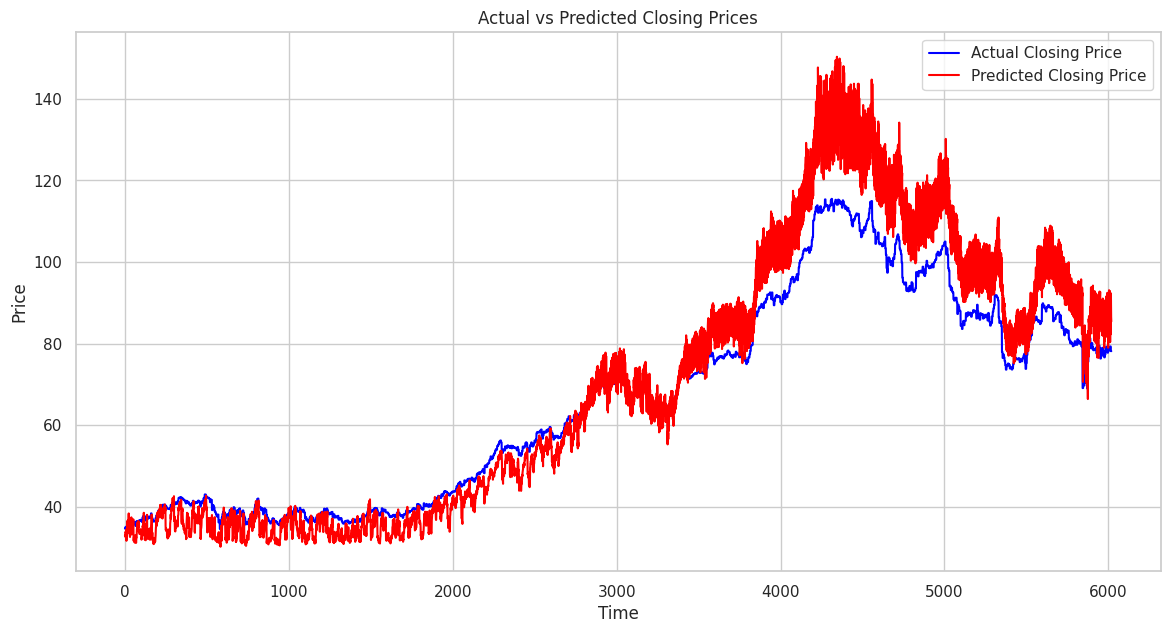

In [76]:
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(X_test)

# Assuming y_pred has shape (6019, 47) for multiple features or time steps
y_pred_single = y_pred[:, 0]  # Assuming the first column is the prediction of interest


# Plotting
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual Closing Price', color='blue')
plt.plot(y_pred_single, label='Predicted Closing Price', color='red')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


